In [5]:
import pandas as pd

file_path = 'C:\\Users\\User\\OneDrive\\Desktop\\python_developer\\partizan_2022\\data\\partizan_2022_cleaned.csv'

df = pd.read_csv(file_path)

### 1. Indetify top performers 

In [6]:
# separate players and team data
players = df[df['player'] != 'PARTIZAN MOZZART BET BELGRADE'].copy()
team = df[df['player'] == 'PARTIZAN MOZZART BET BELGRADE'].copy()

In [7]:
# players desctiptive statistics
player_stats = players.groupby('player').agg({
    'points': 'mean',
    'total_rebounds': 'mean',
    'assists': 'mean',
    'total_seconds': 'mean',
    'valuation' : 'mean'
}).rename(columns={
    'points' : 'average_points',
    'total_rebounds' : 'average_rebounds',
    'assists' : 'average_assists',
    'total_seconds' : 'average_seconds',
    'valuation' : 'average_valuation'
})

player_stats.sort_values(by='average_valuation', ascending=False, inplace=True)

player_stats

,average_points,average_rebounds,average_assists,average_seconds,average_valuation
player,,,,,
Lessort Mathias,12.000000,7.052632,1.394737,1810.315789,19.131579
Punter Kevin,16.081081,2.081081,2.513514,1673.486486,14.972973
Exum Dante,13.184211,2.315789,2.684211,1379.342105,14.315789
Leday Zach,11.435897,5.076923,1.205128,1855.051282,14.076923
Nunnally James,8.921053,2.026316,1.710526,1305.789474,8.552632
Avramovic Aleksa,6.083333,1.833333,1.500000,806.208333,5.166667
Papapetrou Ioannis,5.368421,2.342105,0.947368,1236.631579,5.052632
Smailagic Alen,5.400000,2.000000,0.400000,644.200000,5.033333
Madar Yam,5.666667,1.153846,1.538462,783.641026,4.871795


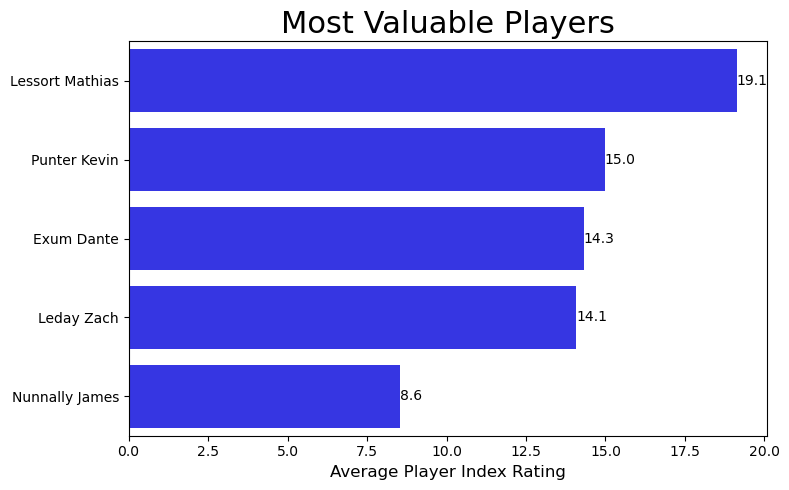

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# filter top 5 players 
top_5 = player_stats.sort_values('average_valuation', ascending=False).head(5)

# plot top 5 players
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='average_valuation', y=top_5.index, data=top_5, color='blue', alpha=0.9,  errorbar=None)
plt.xlabel('Average Player Index Rating', fontsize=12)
plt.ylabel('')  
plt.title('Most Valuable Players', fontsize=22)

# add player names
for i, v in enumerate(top_5['average_valuation']):
    ax.text(v , i, f'{v:.1f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

In [9]:
# foundamental team statistics
team_stats = team.groupby('round').agg({
    'points': 'sum',
    'total_rebounds': 'sum',
    'assists': 'sum'
}).reset_index()

team_averages = team_stats[['points', 'total_rebounds', 'assists']].mean()
print("Team Averages per Game (Partizan Mozzart Bet Belgrade):")
team_averages


Team Averages per Game (Partizan Mozzart Bet Belgrade):


points            85.435897
total_rebounds    29.974359
assists           14.410256
dtype: float64